 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [31]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path

%matplotlib inline

# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [32]:
whale_returns_path = Path("./Resources/whale_returns.csv")

In [33]:
algo_returns_path = Path("./Resources/algo_returns.csv")

In [34]:
sp_tsx_history_path = Path("./Resources/sp_tsx_history.csv")


In [35]:
# Reading whale returns
whale_returns = pd.read_csv(whale_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [36]:
# Count nulls
whale_returns.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [37]:
# Drop nulls
whale_returns.dropna(inplace=True)
whale_returns

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098
2015-03-09,0.000582,0.004225,0.005843,-0.001652
...,...,...,...,...
2019-04-25,-0.000285,-0.001291,-0.005153,0.004848
2019-04-26,0.008149,0.009162,0.012355,0.010434
2019-04-29,0.001254,0.002719,0.006251,0.005223


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [38]:
# Reading algorithmic returns
algo_returns = pd.read_csv(algo_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

In [39]:
# Count nulls
algo_returns.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [40]:
# Drop nulls
algo_returns.dropna(inplace=True)
algo_returns

,Algo 1,Algo 2
Date,,
2014-06-05,0.004062,0.013285
2014-06-06,0.001857,0.008284
2014-06-09,-0.005012,0.005668
2014-06-10,0.004406,-0.000735
2014-06-11,0.004760,-0.003761
...,...,...
2019-04-25,0.000682,-0.007247
2019-04-26,0.002981,0.005256
2019-04-29,0.005208,0.002829


## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [41]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_history = pd.read_csv(sp_tsx_history_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
sp_tsx_history


,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"
...,...
2019-12-20,"$17,118.44"
2019-12-23,"$17,128.71"
2019-12-24,"$17,180.15"


In [42]:
# Check Data Types
sp_tsx_history.dtypes

Close    object
dtype: object

In [47]:
# Fix Data Types
# Remove dollar signs and commas and convert to numeric
sp_tsx_history['Close'] = pd.to_numeric(sp_tsx_history['Close'].replace('[\$,]', '', regex=True))
sp_tsx_history

,Close
Date,
2012-10-01,12370.19
2012-10-02,12391.23
2012-10-03,12359.47
2012-10-04,12447.68
2012-10-05,12418.99
...,...
2019-12-20,17118.44
2019-12-23,17128.71
2019-12-24,17180.15


In [200]:
# Calculate Daily Returns
sp_tsx_returns = sp_tsx_history.pct_change()

In [201]:
# Drop nulls
sp_tsx_returns.dropna(inplace=True)

In [260]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_returns.rename(columns={'Close': 'SP TSX 60'}, inplace=True)
sp_tsx_returns


,SP TSX 60
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709
...,...
2019-12-20,0.003188
2019-12-23,0.000600
2019-12-24,0.003003


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [203]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_returns = pd.concat([whale_returns, algo_returns, sp_tsx_returns], axis='columns', join='inner')
combined_returns.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

<AxesSubplot:title={'center':'Daily Returns'}, xlabel='Date'>

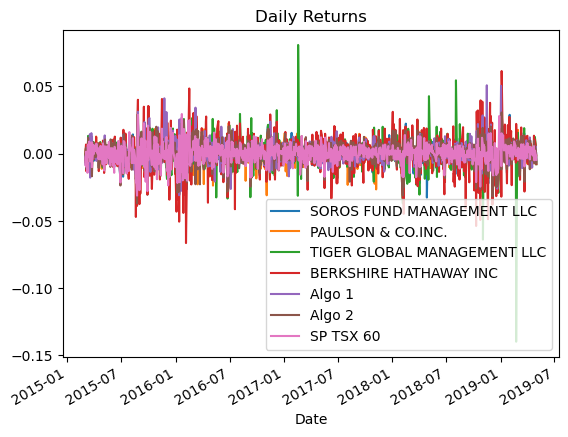

In [204]:
# Plot daily returns of all portfolios
combined_returns.plot(title='Daily Returns')

#### Calculate and Plot cumulative returns.

<AxesSubplot:title={'center':'Cumulative Returns'}, xlabel='Date'>

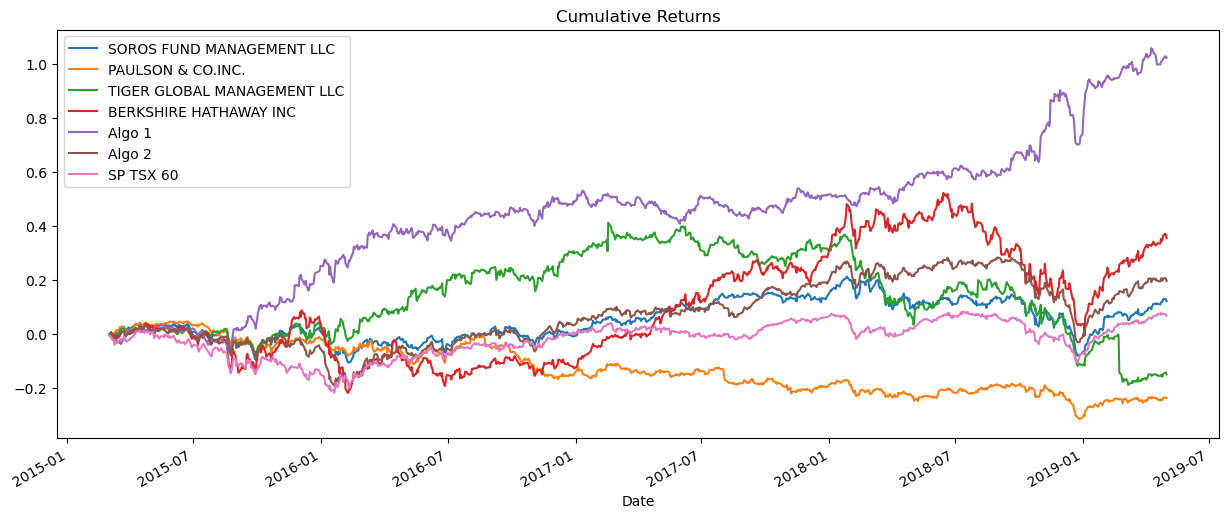

In [205]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_returns).cumprod() - 1
# Plot cumulative returns
cumulative_returns.plot(figsize=(15,6), title='Cumulative Returns')

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


<AxesSubplot:title={'center':'Daily Returns Box Plot'}>

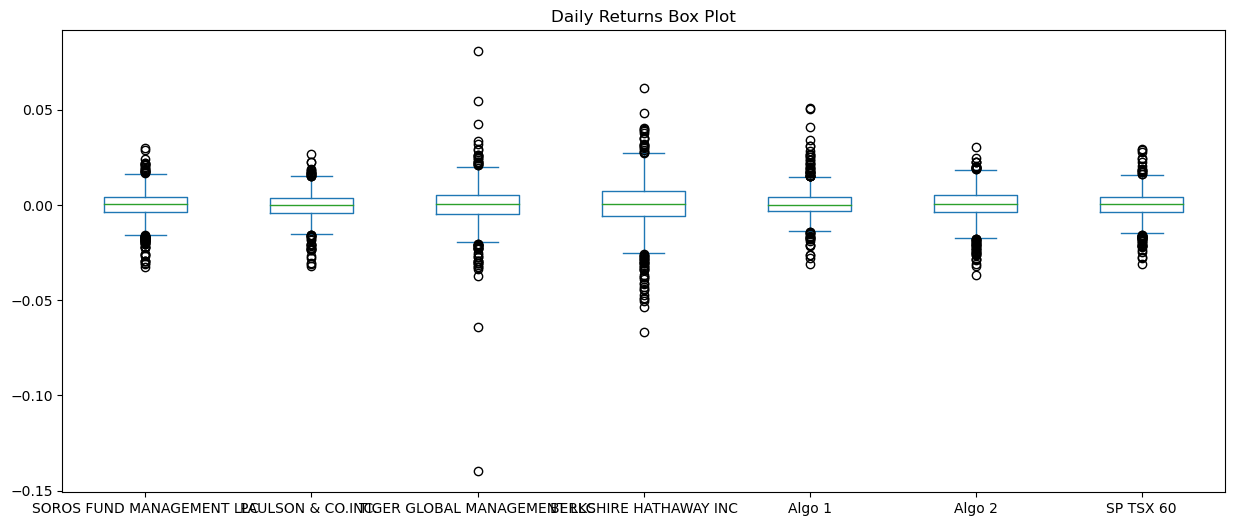

In [206]:
# Box plot to visually show risk
combined_returns.plot.box(figsize=(15,6), title='Daily Returns Box Plot')

### Calculate Standard Deviations

In [207]:
# Calculate the daily standard deviations of all portfolios
daily_std_devs = combined_returns.std()
daily_std_devs

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
SP TSX 60                      0.007034
dtype: float64

### Determine which portfolios are riskier than the S&P TSX 60

In [208]:
# Calculate  the daily standard deviation of S&P TSX 60

tsx_std_dev = combined_returns['SP TSX 60'].std()
tsx_std_dev
# Determine which portfolios are riskier than the S&P TSX 60

riskier_portfolios = daily_std_devs[daily_std_devs > tsx_std_dev]
riskier_portfolios


SOROS FUND MANAGEMENT LLC      0.007828
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
dtype: float64

In [209]:
# The standard deviation of "SOROS FUND MANAGEMENT LLC", "TIGER GLOBAL MANAGEMENT LLC", "BERKSHIRE HATHAWAY INC", "Algo 1" and "Algo 2" are greater than "S&P TSX 60", so those portfolios are risker than "S&P TSX 60".

### Calculate the Annualized Standard Deviation

In [210]:
# Calculate the annualized standard deviation (252 trading days)
annualized_std_devs = daily_std_devs * np.sqrt(252)
annualized_std_devs

SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
SP TSX 60                      0.111664
dtype: float64

---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

In [211]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_devs = combined_returns.rolling(window=21).std()
rolling_std_devs.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2019-04-25,0.004145,0.005572,0.004917,0.006641,0.005801,0.005764,0.003370
2019-04-26,0.004117,0.005649,0.005424,0.006599,0.005562,0.005700,0.003321
2019-04-29,0.004123,0.005374,0.005438,0.006584,0.005251,0.005622,0.003356
2019-04-30,0.004199,0.005408,0.005419,0.006323,0.005294,0.005600,0.003240
2019-05-01,0.004271,0.005009,0.005744,0.006143,0.004972,0.005686,0.003150


<AxesSubplot:title={'center':'Rolling 21-Day Standard Deviation'}, xlabel='Date'>

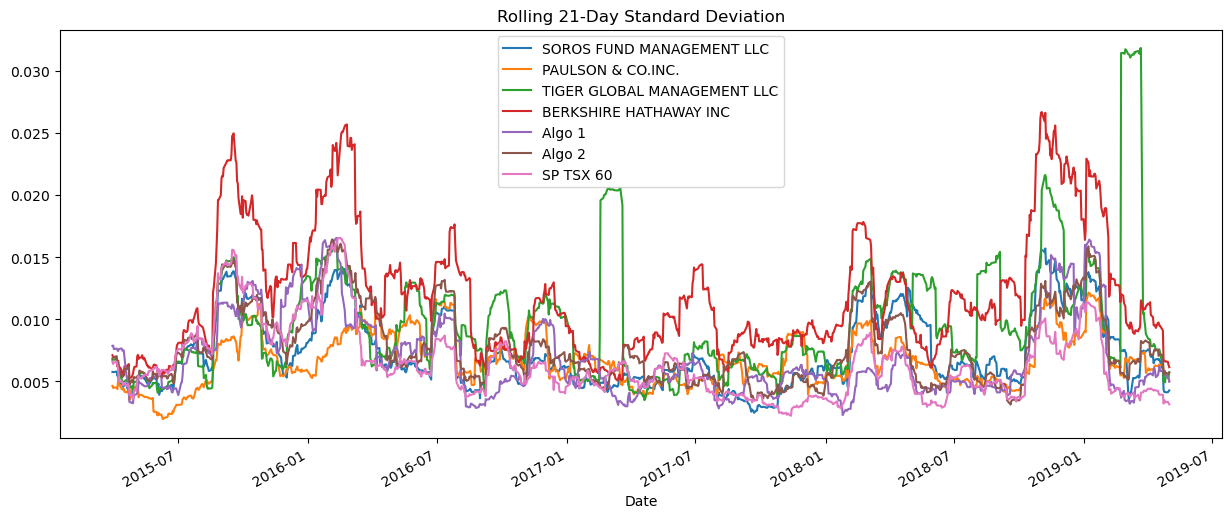

In [212]:
# Plot the rolling standard deviation
rolling_std_devs.plot(title='Rolling 21-Day Standard Deviation', figsize=(15,6))

### Calculate and plot the correlation

In [213]:
# Calculate the correlation
correlation = combined_returns.corr()
# Display de correlation matrix
correlation

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
SOROS FUND MANAGEMENT LLC,1.000000,0.697076,0.560964,0.750181,0.313795,0.826667,0.673930
PAULSON & CO.INC.,0.697076,1.000000,0.433034,0.540033,0.266363,0.674015,0.486511
TIGER GLOBAL MANAGEMENT LLC,0.560964,0.433034,1.000000,0.423524,0.161236,0.506689,0.440583
BERKSHIRE HATHAWAY INC,0.750181,0.540033,0.423524,1.000000,0.289378,0.684609,0.557250
Algo 1,0.313795,0.266363,0.161236,0.289378,1.000000,0.285455,0.310276
Algo 2,0.826667,0.674015,0.506689,0.684609,0.285455,1.000000,0.737370
SP TSX 60,0.673930,0.486511,0.440583,0.557250,0.310276,0.737370,1.000000


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

In [214]:
# Calculate covariance of a single portfolio
covariance = combined_returns['Algo 1'].cov(combined_returns['SP TSX 60'])
# Calculate variance of S&P TSX
variance = combined_returns['SP TSX 60'].var()
# Computing beta
beta = covariance / variance
print(beta)

0.33474459081856844


<AxesSubplot:title={'center':'Rolling 60-Day Beta of Algo 1 vs S&P TSX 60'}, xlabel='Date'>

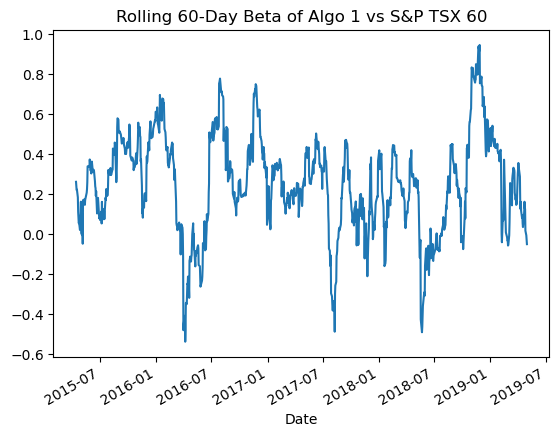

In [215]:
# Plot beta trend
rolling_covariance = combined_returns['Algo 1'].rolling(window=30).cov(combined_returns['SP TSX 60'])
rolling_variance = combined_returns['SP TSX 60'].rolling(window=30).var()

rolling_beta = rolling_covariance / rolling_variance
rolling_beta.plot(title='Rolling 60-Day Beta of Algo 1 vs S&P TSX 60')

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [216]:
# Use `ewm` to calculate the rolling window
rolling_std_devs_ewm = combined_returns.ewm(span=21).std()
rolling_std_devs_ewm.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,SP TSX 60
Date,,,,,,,
2015-03-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-03-04,0.002472,0.005814,0.001441,0.007624,0.004700,0.002380,0.003648
2015-03-05,0.002658,0.004896,0.002519,0.006934,0.004182,0.002645,0.004928
2015-03-06,0.005515,0.004592,0.004808,0.009585,0.003386,0.007399,0.005286
2015-03-09,0.004716,0.004434,0.005702,0.008103,0.002929,0.006422,0.004514


---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [217]:
# Annualized Sharpe Ratios
sharpe_ratios = (combined_returns.mean() * 252) / (combined_returns.std() * np.sqrt(252))
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.286709
PAULSON & CO.INC.             -0.547594
TIGER GLOBAL MANAGEMENT LLC   -0.144455
BERKSHIRE HATHAWAY INC         0.467045
Algo 1                         1.491514
Algo 2                         0.396817
SP TSX 60                      0.195550
dtype: float64

<AxesSubplot:title={'center':'Sharpe Ratios'}>

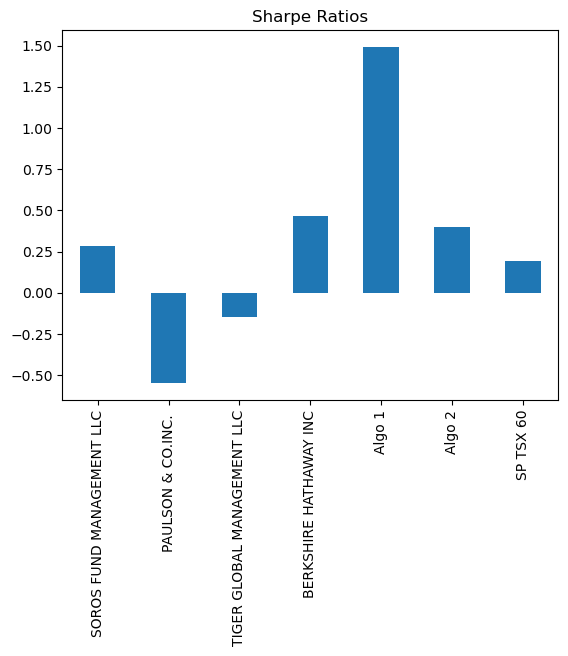

In [218]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratios.plot(kind='bar', title='Sharpe Ratios')

In [219]:
# algorithmic_outperformance = sharpe_ratios.loc[['Algo 1', 'Algo 2']].sum() > sharpe_ratios.loc['SP TSX 60']

algo = sharpe_ratios.loc[['Algo 1', 'Algo 2']].sum()
whales = sharpe_ratios.loc[['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC']].sum()


algorithmic_outperformance = algo > sharpe_ratios.loc['SP TSX 60']

print(algorithmic_outperformance)
print(algo.round(2))

True
1.89


In [220]:
whales_outperformance = whales > sharpe_ratios.loc['SP TSX 60']

print(whales_outperformance)
print(whales.round(2))

False
0.06


In [221]:
sharpe_ratios.loc['SP TSX 60'].round(2)

0.2

### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.


Because the sharpe raios value 1.89(algorithmic strategies) > 0.2(S&P TSX 60) > 0.06 (the whales portfolios), so algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.

---

# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [308]:
# Reading data from 1st stock
aapl_returns_path = Path("./Resources/AAPL.csv")
aapl_returns = pd.read_csv(aapl_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)

aapl_returns.drop('Symbol', axis=1, inplace=True)
aapl_returns.rename(columns={'Close': 'AAPL'}, inplace=True)

In [327]:
# Reading data from 2nd stock
msft_returns_path = Path("./Resources/MSFT.csv")
msft_returns = pd.read_csv(msft_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
msft_returns.drop('Symbol', axis=1, inplace=True)
msft_returns.rename(columns={'Close': 'MSFT'}, inplace=True)

In [331]:
# Reading data from 3rd stock
tsla_returns_path = Path("./Resources/TSLA.csv")
tsla_returns = pd.read_csv(tsla_returns_path, index_col='Date', infer_datetime_format=True, parse_dates=True)
tsla_returns.drop('Symbol', axis=1, inplace=True)
tsla_returns.rename(columns={'Close': 'TSLA'}, inplace=True)

In [332]:
# Combine all stocks in a single DataFrame
all_returns = pd.concat([aapl_returns, msft_returns, tsla_returns], axis='columns', join='inner')

In [333]:
# Reset Date index
all_returns.index = all_returns.index.strftime("%Y-%m-%d")
all_returns.head()

,AAPL,MSFT,TSLA
Date,,,
2018-01-02,43.07,85.95,21.37
2018-01-03,43.06,86.35,21.15
2018-01-04,43.26,87.11,20.97
2018-01-05,43.75,88.19,21.11
2018-01-08,43.59,88.28,22.43


In [334]:
# Reorganize portfolio data by having a column per symbol


In [335]:
# Calculate daily returns
all_daily_returns = all_returns.pct_change()
# Drop NAs
all_daily_returns.dropna(inplace=True)
# Display sample data
all_daily_returns

,AAPL,MSFT,TSLA
Date,,,
2018-01-03,-0.000232,0.004654,-0.010295
2018-01-04,0.004645,0.008801,-0.008511
2018-01-05,0.011327,0.012398,0.006676
2018-01-08,-0.003657,0.001021,0.062530
2018-01-09,-0.000229,-0.000680,-0.008025
...,...,...,...
2019-12-20,-0.002143,0.010918,0.003712
2019-12-23,0.016318,0.000000,0.033654
2019-12-24,0.000986,-0.000191,0.014311


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [336]:
# Set weights
weights = [1/3, 1/3, 1/3]

# Calculate portfolio return
portfolio_return = all_daily_returns.dot(weights)
# Display sample data
portfolio_return.head()

Date
2018-01-03   -0.001958
2018-01-04    0.001645
2018-01-05    0.010134
2018-01-08    0.019964
2018-01-09   -0.002978
dtype: float64

## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [339]:
# Join your returns DataFrame to the original returns DataFrame
combined_returns1 = pd.concat([all_daily_returns, portfolio_return], axis=1,join='inner')
combined_returns1.columns.values[-1] = 'portfolio_return'

In [340]:
# Only compare dates where return data exists for all the stocks (drop NaNs)
combined_returns1.dropna(inplace=True)
combined_returns1

,AAPL,MSFT,TSLA,portfolio_return
Date,,,,
2018-01-03,-0.000232,0.004654,-0.010295,-0.001958
2018-01-04,0.004645,0.008801,-0.008511,0.001645
2018-01-05,0.011327,0.012398,0.006676,0.010134
2018-01-08,-0.003657,0.001021,0.062530,0.019964
2018-01-09,-0.000229,-0.000680,-0.008025,-0.002978
...,...,...,...,...
2019-12-20,-0.002143,0.010918,0.003712,0.004162
2019-12-23,0.016318,0.000000,0.033654,0.016657
2019-12-24,0.000986,-0.000191,0.014311,0.005036


## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [341]:
# Calculate the annualized `std`
annualized_std1 = combined_returns1.std() * np.sqrt(252)
annualized_std1

AAPL                0.276044
MSFT                0.244978
TSLA                0.540546
portfolio_return    0.280281
dtype: float64

### Calculate and plot rolling `std` with 21-day window

<AxesSubplot:xlabel='Date'>

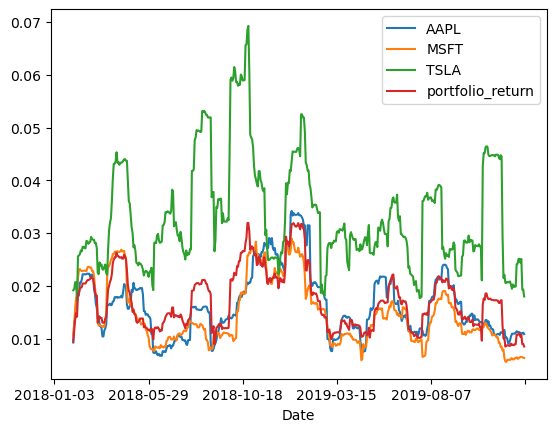

In [342]:
# Calculate rolling standard deviation
rolling_std1 = combined_returns1.rolling(window=21).std()
# Plot rolling standard deviation
rolling_std1.plot()

### Calculate and plot the correlation

<AxesSubplot:>

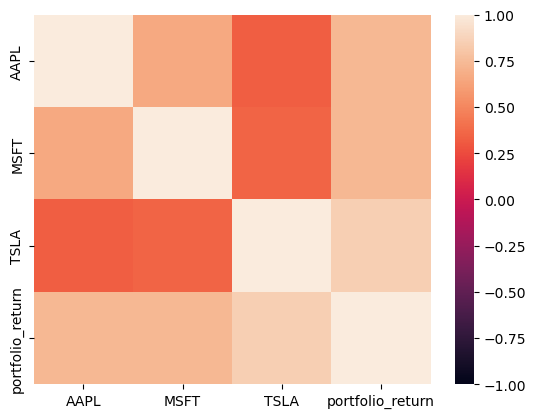

In [377]:
# Calculate and plot the correlation
import seaborn as sns
corr = combined_returns1.corr()

sns.heatmap(corr, vmin=-1, vmax=1)

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

In [406]:
# Calculate and plot Beta
sp_returns = sp_tsx_history.pct_change()
new_combined_returns = pd.concat([portfolio_return, sp_returns], axis=1, join='inner')
new_combined_returns.columns = ["portfolio_return", "SP TSX 60"]
new_combined_returns

,portfolio_return,SP TSX 60
Date,,
2018-01-03,-0.001958,0.003774
2018-01-04,0.001645,0.002528
2018-01-05,0.010134,-0.003869
2018-01-08,0.019964,-0.001944
2018-01-09,-0.002978,0.000097
...,...,...
2019-12-19,0.012511,0.001882
2019-12-20,0.004162,0.003188
2019-12-23,0.016657,0.000600


In [407]:
rolling_cov1 = new_combined_returns['portfolio_return'].rolling(window=60).cov(new_combined_returns['SP TSX 60'])


In [408]:
rolling_var1 = new_combined_returns['SP TSX 60'].rolling(window=60).var()


<AxesSubplot:title={'center':'60-day Rolling Beta of Portfolio vs S&P/TSX 60'}, xlabel='Date'>

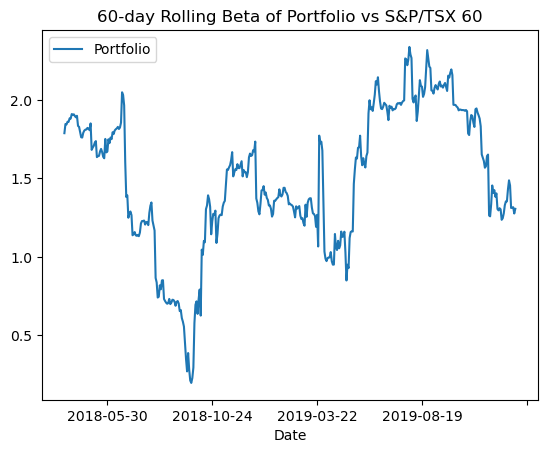

In [412]:
rolling_beta1 = rolling_cov1 / rolling_var1
rolling_beta1.plot(title="60-day Rolling Beta of Portfolio vs S&P/TSX 60", label="Portfolio", legend=True)

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [418]:
# Calculate Annualized Sharpe Ratios
sharpe_ratio = (combined_returns1.mean() * 252) / (combined_returns1.std() * np.sqrt(252))
sharpe_ratio

AAPL                1.088426
MSFT                1.387974
TSLA                0.542295
portfolio_return    1.110327
dtype: float64

<AxesSubplot:>

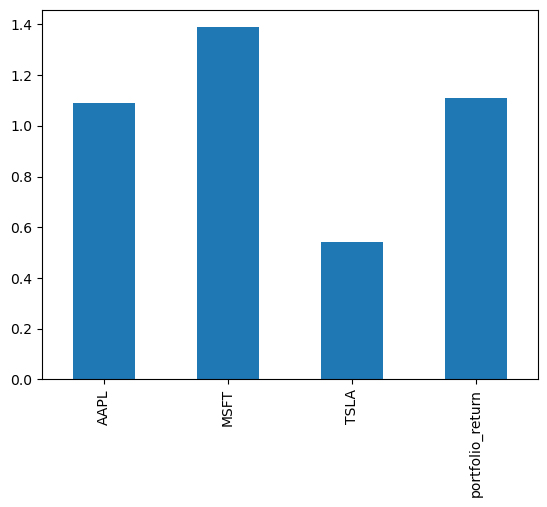

In [419]:
# Visualize the sharpe ratios as a bar plot
sharpe_ratio.plot(kind='bar')


### How does your portfolio do?

#
The portfolio had an annualized standard deviation of 0.280281, which indicates that it had a moderate level of volatility during the period(1/1/18 to 31/12/19) in question. This is lower than the annualized standard deviation of TSLA but higher than that of AAPL, suggesting that the portfolio's risk profile was somewhere in between the two individual assets.

#
The portfolio's 60-day Rolling Beta vs S&P/TSX 60 was below 1 between 06/18 and 11/18, which suggests that the portfolio was less volatile than the market during this period. However, at other times the portfolio's Rolling Beta was above 1, which suggests that the portfolio was more volatile than the market.

#
The individual assets in the portfolio had varying Sharpe ratios. MSFT had the highest Sharpe ratio of 1.387974, which indicates that it had the highest risk-adjusted return of the three assets. AAPL had a Sharpe ratio of 1.088426, which was also quite high, while TSLA had a Sharpe ratio of 0.542295, which suggests that it had a lower risk-adjusted return than the other two assets. The portfolio as a whole had a Sharpe ratio of 1.110327, which is a high value and was second highest among all individual assets in the portfolio. This suggests that the portfolio was able to generate a fairly high risk-adjusted return compared to any single asset in the portfolio.

#
Overall,these metrics suggest that the portfolio had a moderate level of risk during the period from 1/1/18 to 30/12/19, with some periods of higher volatility. Additionally, the portfolio had a relatively high risk profile compared to the market, but was able to generate a strong risk-adjusted return during the period from 1/1/18 to 30/12/19. 